Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the pregnancy file.

In [4]:
import thinkstats2
import thinkplot
import numpy
%matplotlib inline

import nsfg
preg = nsfg.ReadFemPreg()

Select live births, then make a CDF of <tt>totalwgt_lb</tt>. 

In [47]:
live = preg[preg.outcome ==1]
totalwgt_cdf = thinkstats2.Cdf(live.totalwgt_lb)
print "CDF of totalwgt_lb", totalwgt_cdf

CDF of totalwgt_lb Cdf([  0.125    0.3125   0.4375   0.5625   0.625    0.9375   1.       1.0625
   1.125    1.1875   1.25     1.3125   1.375    1.4375   1.5      1.5625
   1.625    1.6875   1.75     1.8125   1.875    2.       2.0625   2.125
   2.1875   2.25     2.3125   2.375    2.4375   2.5      2.5625   2.6875
   2.75     2.8125   2.875    2.9375   3.       3.0625   3.125    3.25
   3.3125   3.375    3.4375   3.5      3.5625   3.625    3.6875   3.75
   3.8125   3.875    3.9375   4.       4.0625   4.125    4.1875   4.25
   4.3125   4.375    4.4375   4.5      4.5625   4.625    4.6875   4.75
   4.8125   4.875    4.9375   5.       5.0625   5.125    5.1875   5.25
   5.3125   5.375    5.4375   5.5      5.5625   5.625    5.6875   5.75
   5.8125   5.875    5.9375   6.       6.0625   6.125    6.1875   6.25
   6.3125   6.375    6.4375   6.5      6.5625   6.625    6.6875   6.75
   6.8125   6.875    6.9375   7.       7.0625   7.125    7.1875   7.25
   7.3125   7.375    7.4375   7.5      7.5625  

Display the CDF.

/home/casey/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


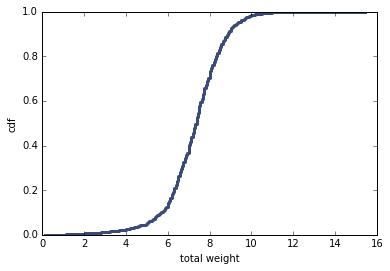

In [6]:
thinkplot.Cdf(totalwgt_cdf)
thinkplot.Show(xlabel = 'total weight', ylabel = 'cdf')

This is really a compelling way to visualize data. I think I prefer this over pmfs. In the graph above, we can see the clear ends to the bell curve and easily identify the steep slope that would be part of the majority of the bellcurve. 

Find out how much you weighed at birth, if you can, and compute CDF(x). 

In [7]:
my_weight = 7.5
p_mine = totalwgt_cdf.Prob(my_weight)
print "My CDF: ", p_mine

My CDF:  0.577561407391


According to my mom, I weighed around 7.5 pounds and therefore, I would be in the 57th percentile, weighed more or equal to 67 percent of the children born in 2002 with this data.

If you are a first child, look up your birthweight in the CDF of first children; otherwise use the CDF of other children.

In [8]:
firsts = live[live.birthord == 1]
firsts_cdf = thinkstats2.Cdf(firsts.totalwgt_lb)

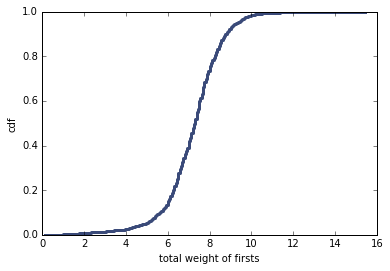

In [9]:
thinkplot.Cdf(firsts_cdf)
thinkplot.Show(xlabel = 'total weight of firsts', ylabel = 'cdf')

In [10]:
p_mine_firsts = firsts_cdf.Prob(my_weight)
print "My CDF in data in data of first children: ", p_mine_firsts

My CDF in data in data of first children:  0.597753839102


I am a first child, so I used the CDF of first children. In comparison to the CDF of all children alive, I am now in the 60th percentile. INtersentingly enough I weigh more or equal to than 60 percent of the children in this range. 

Compute the percentile rank of your birthweight

In [48]:
print "My percentile rank in the first children data set", firsts_cdf.PercentileRank(my_weight)

My percentile rank in the first children data set 59.7753839102


Compute the median birth weight by looking up the value associated with p=0.5.

In [12]:
percentile = firsts_cdf.Percentile(50)
print "Average median birth weight: " , percentile

Average median birth weight:  7.3125


It turns out I was just above the median birth weight. 

Compute the interquartile range (IQR) by computing percentiles corresponding to 25 and 75. 

In [13]:
IQR = firsts_cdf.Percentile(75) - firsts_cdf.Percentile(25)
print "interquartile range or measure spread of distribution: ", IQR

interquartile range or measure spread of distribution:  1.5625


Make a random selection from <tt>cdf</tt>.

In [39]:
random_selection = firsts_cdf[numpy.random.randint(0, 5)]
print "This is the random selection: ", random_selection

170
This is the random selection:  0.0272748109099


I'm not sure what the purpose of the random selection was?

Draw a random sample from <tt>cdf</tt>.

In [41]:
random_sample= numpy.random.choice(firsts.totalwgt_lb, 100, replace = True)

Draw a random sample from <tt>cdf</tt>, then compute the percentile rank for each value, and plot the distribution of the percentile ranks.

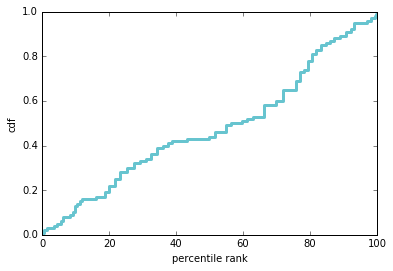

In [50]:
ranks = [firsts_cdf.PercentileRank(element) for element in random_sample]
ranks_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(ranks_cdf)
thinkplot.Show(xlabel = 'percentile rank' ,ylabel = 'cdf')

This makes sense why it is linear and almost a straight line because they are almost basically the same concept of finding the percentile rank or the count of greater than or equal to in the data set.

Generate 1000 random values using <tt>random.random()</tt> and plot their PMF.

In [43]:
random = numpy.random.random(size = 1000)

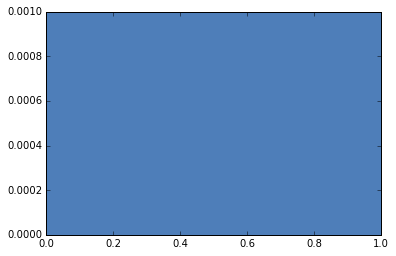

In [44]:
pmf = thinkstats2.Pmf(random)
thinkplot.Pmf(pmf)

This is all blue. It looks like a blob. 

Assuming that the PMF doesn't work very well, try plotting the CDF instead.

{'xscale': 'linear', 'yscale': 'linear'}

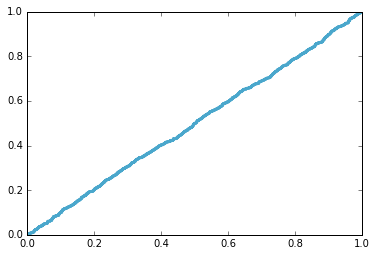

In [45]:
cdf = thinkstats2.Cdf(random)
thinkplot.Cdf(cdf)

Woah! How?? The Pmf of this data is now linear. I guess my random.random() values are many very small floats. I guess pmfs do not do well with many small floats. Like 4.1 mentioned, pmfs get worse with too many values because the more values, the less percentage of the whole each one becomes and therefore, the more rounding and smaller the numbers become and this increases the possibility of noise. It's so cool that Pmfs can make something out of these many values so clearly

### Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

### Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

### Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.